In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hashlib
import random
import string
import hmac

In [4]:
e = 2**52
salt = "0000000000000000000fa3b65e43e4240d71762a5bf397d5304b2596d116859c"

In [26]:
game_hash = '100af1b49f5e9f87efc81f838bf9b1f5e38293e5b4cf6d0b366c004e0a8d9987'

def get_result(game_hash):
    hm = hmac.new(str.encode(game_hash), b'', hashlib.sha256)
    hm.update(salt.encode("utf-8"))
    h = hm.hexdigest()
    if (int(h, 16) % 33 == 0):
        return 1
    h = int(h[:13], 16)
    e = 2**52
    return (((100 * e - h) / (e-h)) // 1) / 100.0

def get_prev_game(hash_code):
    m = hashlib.sha256()
    m.update(hash_code.encode("utf-8"))
    return m.hexdigest()

In [40]:
get_result("f5185a580e99b3b6eda09efb22e1108480b420e29b221e3308769a82dfdcc7aa")

6.17

In [39]:
get_prev_game("0000000000000000000fa3b65e43e4240d71762a5bf397d5304b2596d116859c")

'f5185a580e99b3b6eda09efb22e1108480b420e29b221e3308769a82dfdcc7aa'

In [34]:

game_hash = '1dcd16aaab00550b63a44e7b0234616852843047751881b7b46ed735c08f21c3' # Update to latest game's hash for more results
first_game = "77b271fe12fca03c618f63dfb79d4105726ba9d4a25bb3f1964e435ccf9cb209"

results = []
count = 0
while game_hash != first_game:
    count += 1
    results.append(get_result(game_hash))
    game_hash = get_prev_game(game_hash)
    
results = np.array(results)

In [48]:
print(count)

1276776


Text(0.5, 0, 'Multiplier')

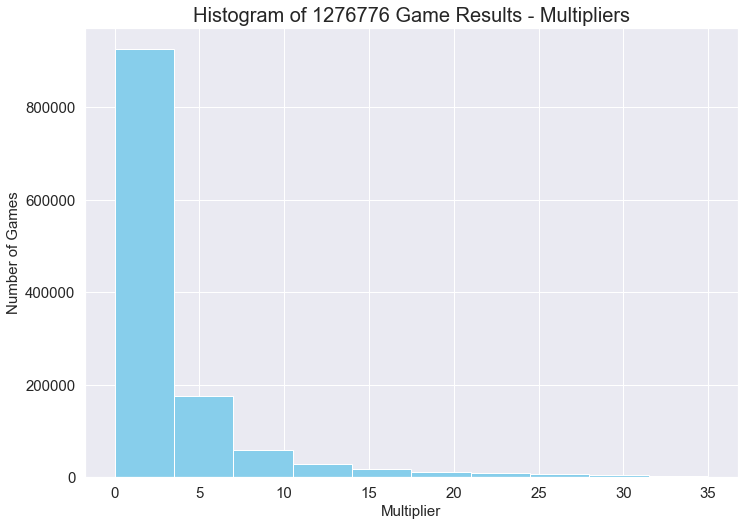

In [49]:

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.hist(results, range=(0, 35), color = 'skyblue')
plt.title("Histogram of 1276776 Game Results - Multipliers", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of Games", fontsize=15)
plt.xlabel("Multiplier", fontsize=15)

In [53]:
# probability formula
multiplier = 500
(results <= multiplier).mean(), 1/33 + (32/33)*(.01 + .99*(1 - 1/multiplier))


(0.9981022512954504, 0.99808)

In [56]:
multiplier = 5
((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01))))*-1 + (multiplier-1)*(1 - ((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01)))))

-0.03807615230460937

In [58]:
(results < multiplier).mean() * -1 + (multiplier - 1)*(results >= multiplier).mean()

-0.0380654084976535

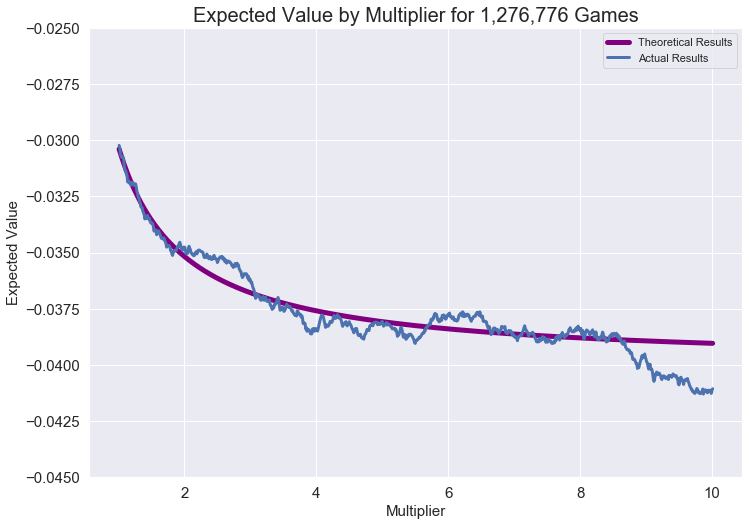

In [61]:
def calculate_ev(multiplier):
    return ((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01))))*-1 + (multiplier-1)*(1 - ((1/33) + (32/33)*(.01 + .99*(1 - 1/(multiplier-.01)))))

xs = np.linspace(101, 1001, 901) / 100
ys = [calculate_ev(x) for x in xs]
y2s = [(results < x).mean() * -1 + (x - 1)*(results >= x).mean() for x in xs]

plt.plot(xs, ys, linewidth=5, color ='purple')
plt.xlabel("Multiplier", fontsize=15)
plt.ylabel("Expected Value", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-.045, -.025)
plt.plot(xs, y2s, linewidth=3)
plt.title("Expected Value by Multiplier for 1,276,776 Games", fontsize=20)
plt.legend(["Theoretical Results", "Actual Results"])